## Lab 2: Simulation of R-C amplifier circuit (continuous system)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
h = 0.00002  # time interval
ein = 1.5  # input (excitation) voltage
a11 = -50
a21 = -1e4
a22 = -21.5
b1 = -a11
b2 = -a21
N = 15000  # number of time intervals to simulate

# Initials
v1 = np.zeros(N)
v2 = np.zeros(N)

# Derivatives
def del_v1(v1):
    return a11 * v1 + b1 * ein

def del_v2(v1, v2):
    return a21 * v1 + a22 * v2 + b2 * ein

# Simulate
for i in range(N-1):
    # Approximate v1
    m1 = del_v1(v1[i])
    m2 = del_v1(v1[i] + m1 * h / 2)
    m3 = del_v1(v1[i] + m2 * h / 2)
    m4 = del_v1(v1[i] + m3 * h)
    v1[i + 1] = v1[i] + h * (m1 + 2 * m2 + 2 * m3 + m4) / 6

    # Approximate v2
    dv1 = v1[i + 1] - v1[i]
    m1 = del_v2(v1[i], v2[i])
    m2 = del_v2(v1[i] + dv1 / 2, v2[i] + m1 * h / 2)
    m3 = del_v2(v1[i] + dv1 / 2, v2[i] + m2 * h / 2)
    m4 = del_v2(v1[i] + dv1, v2[i] + m3 * h)
    v2[i + 1] = v2[i] + h * (m1 + 2 * m2 + 2 * m3 + m4) / 6

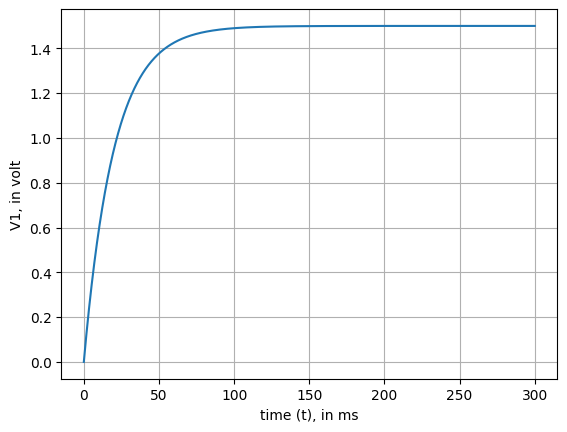

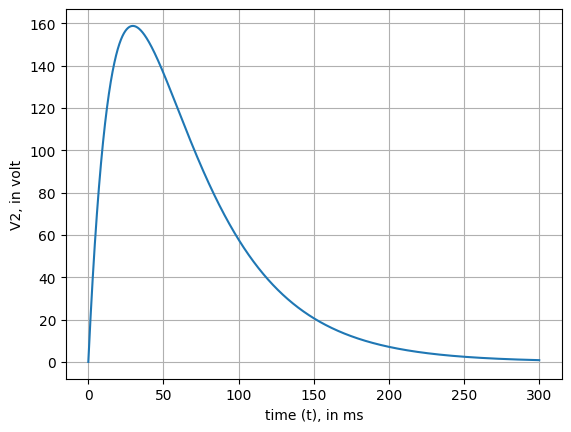

In [2]:
# Plot
t = np.arange(0, N) * h * 1000

plt.figure(1)
plt.plot(t, v1)
plt.grid()
plt.xlabel('time (t), in ms')
plt.ylabel('V1, in volt')

plt.figure(2)
plt.plot(t, v2)
plt.grid()
plt.xlabel('time (t), in ms')
plt.ylabel('V2, in volt')

plt.show()


In [3]:
t

array([0.0000e+00, 2.0000e-02, 4.0000e-02, ..., 2.9994e+02, 2.9996e+02,
       2.9998e+02])